## Project title: “COMPLEX-BASED 2D PEROTEIN IMAGE CLASSIFICATION WITH CNN, RF, SVM.”

DESCRIPTION: In this study, we propose a novel complex-based approach for 2D representation of amino acid sequences. To investigate the representational power of this new approach, amino acid sequences belonging to kinase and GPCR protein families are converted into 2D images and tested on the protein classification problem using Support Vector Machines (SVM), Random Forests (RF) and Convolutional Neural Networks (DNN). 

# THE STUDY PROCEEDS IN THE FOLLOWING STEPS:

- STEP 1 (DATA IMPORT): Amino acid sequences of kinase and GPCR proteins are imported separately in fasta form from the NCBI gene bank using accession numbers.

- STEP 2 (DATA PREPROCESSING): The amino acid sequences of kinase and GPCR proteins are labeled as “1” and “0”, randomly shuffled and saved as a single data frame in fasta form.

- STEP 3 (COMPLEX CODING): The data frame in fasta form is converted into complex numbers with our proposed Complex Encoding Method and saved as a complex-valued data frame.

- STEP 4 (CONVERSION TO 2D IMAGES): The amino acid sequences converted into complex numbers are converted into 2D images to create a meaningful and distinct pattern specific to each protein and to be given as input to neural networks. The images are labeled and saved as a new 2D image data frame.

- STEP 5 (CNN-2D PROTEİN CLASSIFICATION): 2D complex image data representing kinase and GPCR proteins are classified using Convolutional Neural networks.

- STEP 6 (SVM-2D PROTEİN CLASSIFICATION): 2D complex image data representing kinase and GPCR proteins are classified using Support vector machines.

- STEP 7 (RF-2D PROTEİN CLASSIFICATION): 2D complex image data representing kinase and GPCR proteins are classified using Random Forest.



# STEP 1 (DATA IMPORT):

- For the KİNASE protein family, imports the 100 Amino acid sequences from NCBI and saves them in a file:


In [ ]:
#For the KİNASE protein family, imports the 100 Amino acid sequences from NCBI and saves them in a file:

from Bio import Entrez, SeqIO
import pandas as pd

# Set email address for Entrez requests
Entrez.email = "https://www.ncbi.nlm.nih.gov/protein"

# Define protein accession numbers
accessions = ["CAA77753.1",
"CAA77752.1",
"CAA42411.1",
"CAA33389.1",
"CAA42556.1",
"CAA42713.1",
"CAA44396.1",
"CAA42744.1",
"CAA38700.1",
"CAA40491.1",
"CAA43372.1",
"CAA46388.1",
"NP_001015048.1",
"CAA78813.1",
"CAA39849.1",
"CAA47001.1",
"CAA47002.1",
"CAA47004.1",
"CAA47006.1",
"CAA47008.1",
"AAH93072.1",
"AAA51548.1",
"AAA35503.1",
"AAA58363.1",
"AAA58364.1",
"AAA58391.1",
"AAB50921.1",
"AAB50922.1",
"AAA58424.1",
"NP_060260.3",
"AAH93822.1",
"AAA76851.1",
"AAA52025.1",
"AAA96609.1",
"AAA98744.1",
"AAH92416.1",
"AAC14449.1",
"AAC14450.1",
"AAC14451.1",
"AAA58459.1",
"NP_008959.3",
"NP_001015878.1",
"BAD96360.1",
"AAA59502.1",
"AAA59555.1",
"AAB59362.1",
"AAA36318.1",
"AAA36406.1",
"AAB59449.1",
"AAA36409.1",
"AAA36410.1",
"AAA36411.1",
"AAA03176.1",
"AAA18253.1",
"AAA36442.1",
"AAA60095.1",
"BAD96365.1",
"AAA60099.1",
"AAA60170.1",
"AAA03175.1",
"AAC41690.1",
"AAA60102.1",
"AAA60100.1",
"AAA60104.1",
"AAA36449.1",
"AAA36539.1",
"BAA01547.1",
"AAC82497.1",
"BAD96423.1",
"AAB26341.1",
"AAA35639.1",
"AAA58620.1",
"AAA52643.1",
"AAA52644.1",
"AAA36206.1",
"AAA59540.1",
"AAA36488.1",
"AAA36748.1",
"CAA48870.1",
"CAA41728.1",
"CAA51837.1",
"BAD96489.1",
"AAA36585.1",
"AAA36614.1",
"AAA36615.1",
"AAA52576.1",
"AAA36657.1",
"AAA60078.1",
"AAA60175.1",
"AAA18284.1",
"AAA36659.1",
"AAA18251.1",
"BAD96647.1",
"AAA03565.1",
"AAA60171.1",
"AAC50062.1",
"AAA35673.1",
"AAA16703.1",
"CAA53536.1",
"AAA18225.1"]

# Fetch protein sequences and store them in a list
records = []
for accession in accessions:
    handle = Entrez.efetch(db="protein", id=accession, rettype="fasta", retmode="text")
    record = SeqIO.read(handle, "fasta")
    records.append(record)
    handle.close()

# Create pandas dataframe with the accession numbers and sequences
data = []
for record in records:
    accession = record.id.split(" ")[0]
    sequence = str(record.seq)
    data.append({"Accession": accession, "Sequence": sequence})
df = pd.DataFrame(data)

# Save dataframe to excel file
df.to_excel("D:\datasetTEZ\KİNASE_AminoAcid_Fasta.xlsx", index=False)


Below are the first five lines of the KİNAZ amino acid sequences downloaded to the file, printed with .head():

In [4]:
# Print first 5 lines of User File path using .head()

import pandas as pd

output_file = "D:\datasetTEZ\KİNASE_AminoAcid_Fasta.xlsx"

# Read the output file
output_data = pd.read_excel(output_file)
 
print(output_data.head())

    Accession                                           Sequence
0  CAA77753.1  MVRGQVFDVGPRYTNLSYIGEGAYGMVCSAYDNVNKVRVAIKKISP...
1  CAA77752.1  MAAAAAAGAGPEMVRGQVFDVGPRYTNLSYIGEGAYGMVCSAYDNV...
2  CAA42411.1  MAEKGDCIASVYGYDLGGRFVDFQPLGFGVNGLVLSAVDSRACRKV...
3  CAA33389.1  MPFSNSHNALKLRFPAEDEFPDLSAHNNHMAKVLTPELYAELRAKS...
4  CAA42556.1  MSAIQAAWPSGTECIAKYNFHGTAEQDLPFCKGDVLTIVAVTKDPN...


- For the GPCR protein family, imports the 100 Amino acid sequences from NCBI and saves them in a file:

In [ ]:

#For the GPCR protein family, imports the 100 Amino acid sequences from NCBI and saves them in a file:

from Bio import Entrez, SeqIO
import pandas as pd

# Set email address for Entrez requests
Entrez.email = "https://www.ncbi.nlm.nih.gov/protein"

# Define protein accession numbers
accessions = ["CAA77746.1",
"CAA40530.1",
"CAA38699.1",
"CAA39286.1",
"CAA45319.1",
"CAA33336.1",
"CAA33337.1",
"CAA77558.1",
"CAA40963.1",
"AAA35491.1",
"AAA58353.1",
"AAA58355.1",
"AAA51570.1",
"AAA51598.1",
"AAA35535.1",
"AAA62831.1",
"AAA58408.1",
"AAB05207.1",
"AAA88024.1",
"AAA52342.1",
"AAA35847.1",
"AAA52478.1",
"AAA88050.1",
"AAA58647.1",
"AAA58675.1",
"AAA36108.1",
"AAA59933.1",
"AAA36366.1",
"AAA16594.1",
"AAA60001.1",
"AAA60070.1",
"BAA01920.1",
"BAA14398.1",
"BAA01720.1",
"BAA01050.1",
"BAA01722.1",
"BAA02445.1",
"CAA43953.1",
"CAA39284.1",
"AAA35604.1",
"AAA35924.1",
"AAA16617.1",
"CAA50641.1",
"CAA68560.1",
"AAB25531.1",
"AAB26273.1",
"AAA36605.1",
"AAA58247.1",
"AAA60315.1",
"AAA60316.1",
"AAA36641.1",
"AAA36646.1",
"AAA60601.1",
"AAA03651.1",
"CAA52376.1",
"AAC37538.1",
"AAA03209.1",
"AAC52063.1",
"CAA50979.1",
"AAC13372.1",
"AAC13373.1",
"CAA54182.1",
"AAA36434.1",
"AAA60002.1",
"AAA17684.1",
"BAA05840.1",
"AAA73958.1",
"AAA74230.1",
"CAA54031.1",
"AAA19119.1",
"AAB60351.1",
"CAA84380.1",
"AAA98990.1",
"CAA46621.1",
"AAB60656.1",
"AAC09005.1",
"BAA03319.1",
"AAB29854.1",
"AAB31320.1",
"AAB59437.1",
"AAC14460.1",
"AAA64592.1",
"AAA64593.1",
"BAA04120.1",
"AAC50158.1",
"AAA63180.1",
"AAA62837.1",
"AAA63181.1",
"AAA61794.1",
"CAA58749.1",
"CAA58739.1",
"CAA58740.1",
"AAB59486.1",
"AAA62158.1",
"AAB59487.1",
"AAA98457.1",
"AAA62271.1",
"AAA63906.1",
"BAA08618.1",
"CAA57019.1"]

# Fetch protein sequences and store them in a list
records = []
for accession in accessions:
    handle = Entrez.efetch(db="protein", id=accession, rettype="fasta", retmode="text")
    record = SeqIO.read(handle, "fasta")
    records.append(record)
    handle.close()

# Create pandas dataframe with the accession numbers and sequences
data = []
for record in records:
    accession = record.id.split(" ")[0]
    sequence = str(record.seq)
    data.append({"Accession": accession, "Sequence": sequence})
df = pd.DataFrame(data)

# Save dataframe to excel file
df.to_excel("D:\datasetTEZ\GPCR_AminoAcid_Fasta.xlsx", index=False)

Below are the first five lines of the GPCR amino acid sequences downloaded to the file, printed with .head():

In [5]:
# Print first 5 lines of User File path using .head()

import pandas as pd

output_file = "D:\datasetTEZ\GPCR_AminoAcid_Fasta.xlsx"

# Read the output file
output_data = pd.read_excel(output_file)

print(output_data.head())

    Accession                                           Sequence
0  CAA77746.1  MLMASTTSAVPGHPSLPSLPSNSSQERPLDTRDPLLARAELALLSI...
1  CAA40530.1  MNSFNYTTPDYGHYDDKDTLDLNTPVDKTSNTLRVPDILALVIFAV...
2  CAA38699.1  MKSILDGLADTTFRTITTDLLYVGSNDIQYEDIKGDMASKLGYFPQ...
3  CAA39286.1  MRTLNTSAMDGTGLVVERDFSVRILTACFLSLLILSTLLGNTLVCA...
4  CAA45319.1  METNFSTPLNEYEEVSYESAGYTVLRILPLVVLGVTFVLGVLGNGL...


# STEP 2 (DATA PREPROCESSING):


- The amino acid sequences of the Kinase and GPCR proteins in two different files are labelled "1" and "0", randomly shuffled and saved in a new file as a single data frame in fasta form.

In [7]:
#Amino acid fasta sequences of kinase and GPCR protein families are labelled as "1" and "0", randomly shuffled, and saved as a single dataframe.

#Dataframe for Amino acid 

import pandas as pd
from sklearn.utils import shuffle

# Step 1: Load and labelling data
kinaz_df = pd.read_excel("D:\datasetTEZ\KİNASE_AminoAcid_Fasta.xlsx")
kinaz_df['label'] = 1

gpcr_df = pd.read_excel("D:\datasetTEZ\GPCR_AminoAcid_Fasta.xlsx")
gpcr_df['label'] = 0

# Step 2: Limit protein sequences to 300 characters
#kinaz_df['Sequence'] = kinaz_df['Sequence'].str[:300]
#gpcr_df['Sequence'] = gpcr_df['Sequence'].str[:300]

# Step 3: Combine data and shuffle randomly
combined_df = pd.concat([kinaz_df, gpcr_df])
shuffled_df = shuffle(combined_df)

# Step 4: Save data to Excel file
shuffled_df.to_excel("D:\datasetTEZ\KİNASE_GPCR_Fasta_AAcid.xlsx", index=False)



The first five lines of the dataframe for the KINASE (1) and GPCR (0) amino acid sequences are as follows:

In [8]:
# Print first 5 lines of User File path using .head()

import pandas as pd

output_file = "D:\datasetTEZ\KİNASE_GPCR_Fasta_AAcid.xlsx"

# Read the output file
output_data = pd.read_excel(output_file)

print(output_data.head())

    Accession                                           Sequence  label
0  AAA51570.1  MNNSTNSSNNSLALTSPYKTFEVVFIVLVAGSLSLVTIIGNILVMV...      0
1  AAC41690.1  MAAPAAATAMGNAPAKKDTEQEESVNEFLAKARGDFLYRWGNPAQN...      1
2  AAA35639.1  MLKVTVPSCSASSCSSVTASAAPGTASLVPDYWIDGSNRDALSDFF...      1
3  CAA50641.1  MEGISIYTSDNYTEEMGSGDYDSMKEPCFREENANFNKIFLPTIYS...      0
4  BAA01722.1  MEGISIYTSDNYTEEMGSGDYDSMKEPCFREENANFNKIFLPTIYS...      0


## STEP 3 (COMPLEX CODİNG)

- The dataframe in categorical (Fasta) form is converted into complex numbers by the proposed Complex Coding Method and saved as a complex-valued dataframe in the following user file path.

In [9]:
#Encodes amino acid fasta sequences into complex numbers with the proposed method:

#Proposed amino acid complex coding method:

import pandas as pd 
import cmath
import numpy as np
import random

def encode_sequence(sequence):
    valid_amino_acids = 'ARNDCQEGHILKMFPSTWYV'
    encoded = []
    for i, aa in enumerate(sequence):
        if aa == 'X':
            aa = random.choice(valid_amino_acids)
        if aa in valid_amino_acids:
            r = i + 1  # Amplitude
            theta = cmath.pi * (valid_amino_acids.index(aa) + 1) / 10  # angle (phase)
            encoded.append(cmath.rect(r, theta))
        else:
            print(f"Warning: Invalid amino acid '{aa}' encountered in sequence. Skipping.")
    return encoded

def get_components(complex_list):
    reals = [round(cplx.real, 5) for cplx in complex_list]  # round to 5th digit after comma
    imags = [round(cplx.imag, 5) for cplx in complex_list]  # round to 5th digit after comma
    mods = [round(abs(cplx), 5) for cplx in complex_list]  # round to 5th digit after comma
    args = [round(cmath.phase(cplx), 5) for cplx in complex_list]  # round to 5th digit after comma
    
    # Returns lists for new columns
    return reals, imags, mods, args

# Read data
combined_df = pd.read_excel("D:\datasetTEZ\KİNASE_GPCR_Fasta_AAcid.xlsx")

# Generate a list of complex numbers
combined_df['Complex'] = combined_df['Sequence'].apply(encode_sequence)

# Calculate the components of complex numbers and add them to new columns
combined_df['Real'], combined_df['Imag'], combined_df['Mod'], combined_df['Arg'] = zip(*combined_df['Complex'].apply(get_components))

# Save data encoded in complex numbers as a new data frame:
combined_df.to_excel("D:\datasetTEZ\KİNASE_GPCR_COMPLEX_AAcid.xlsx")





The first 5 lines of the data frame, which consists of amino acids coded into complex numbers, are given below:

In [6]:
# Print first 5 lines of User File path using .head()

import pandas as pd

output_file = "D:\datasetTEZ\KİNASE_GPCR_COMPLEX_AAcid.xlsx"

# Read the output file
output_data = pd.read_excel(output_file)

print(output_data.head())

   Unnamed: 0   Accession                                           Sequence  \
0           0  AAA51570.1  MNNSTNSSNNSLALTSPYKTFEVVFIVLVAGSLSLVTIIGNILVMV...   
1           1  AAC41690.1  MAAPAAATAMGNAPAKKDTEQEESVNEFLAKARGDFLYRWGNPAQN...   
2           2  AAA35639.1  MLKVTVPSCSASSCSSVTASAAPGTASLVPDYWIDGSNRDALSDFF...   
3           3  CAA50641.1  MEGISIYTSDNYTEEMGSGDYDSMKEPCFREENANFNKIFLPTIYS...   
4           4  BAA01722.1  MEGISIYTSDNYTEEMGSGDYDSMKEPCFREENANFNKIFLPTIYS...   

   label                                            Complex  \
0      0  [(-0.5877852522924732-0.8090169943749473j), (1...   
1      1  [(-0.5877852522924732-0.8090169943749473j), (1...   
2      1  [(-0.5877852522924732-0.8090169943749473j), (-...   
3      0  [(-0.5877852522924732-0.8090169943749473j), (-...   
4      0  [(-0.5877852522924732-0.8090169943749473j), (-...   

                                                Real  \
0  [-0.58779, 1.17557, 1.76336, 1.23607, 2.93893,...   
1  [-0.58779, 1.90211, 2.853

## STEP 4 (TRANSFORM TO 2D IMAGES):

- Amino acid sequences encoded in complex numbers are transformed into a complex-based 2D image with a different pattern specific to each protein and saved as an imag-data frame.

In [81]:
# complex numbers to 2D 
import pandas as pd
import matplotlib.pyplot as plt
import ast
import os

def plot_and_save_complex_numbers_with_labels(file_path, save_path):
    # Excel dosyasını oku
    df = pd.read_excel(file_path, header=0)

    # Convert string expressions in 'Complex' column to list
    df['Complex'] = df['Complex'].apply(ast.literal_eval)
    
    #Create save directory
    if not os.path.exists(save_path):
        os.makedirs(save_path)

    for index, row in df.iterrows():
        # Complex number sequence and labels
        complex_numbers = row['Complex']
        label = row['label']

        # part of Reel and Image 
        real_parts = [c.real for c in complex_numbers]
        imaginary_parts = [c.imag for c in complex_numbers]

        # graphic drawing
        plt.figure(figsize=(8, 8), dpi=300)  # Optimized for higher DPI
        plt.scatter(real_parts, imaginary_parts, color='blue', s=10, alpha=0.7, edgecolor='k')  # Noktaların boyutu ve saydamlığı ayarlandı
        plt.xlabel('Real Part')
        plt.ylabel('Imaginary Part')
        plt.axis('off')  

        # Saving graphics
        filename = os.path.join(save_path, f'plot_{index+1}_label_{label}.png')
        plt.savefig(filename, format='png', bbox_inches='tight', pad_inches=0)
        plt.close()
        print(f'Saved: {filename}')  


file_path = r"D:\datasetTEZ\KİNASE_GPCR_COMPLEX_AAcid.xlsx"  
save_path = r"D:\2DproteinIMAGE1"  
plot_and_save_complex_numbers_with_labels(file_path, save_path)




Saved: D:\2DproteinIMAGE1\plot_1_label_0.png
Saved: D:\2DproteinIMAGE1\plot_2_label_1.png
Saved: D:\2DproteinIMAGE1\plot_3_label_1.png
Saved: D:\2DproteinIMAGE1\plot_4_label_0.png
Saved: D:\2DproteinIMAGE1\plot_5_label_0.png
Saved: D:\2DproteinIMAGE1\plot_6_label_1.png
Saved: D:\2DproteinIMAGE1\plot_7_label_1.png
Saved: D:\2DproteinIMAGE1\plot_8_label_0.png
Saved: D:\2DproteinIMAGE1\plot_9_label_0.png
Saved: D:\2DproteinIMAGE1\plot_10_label_1.png
Saved: D:\2DproteinIMAGE1\plot_11_label_1.png
Saved: D:\2DproteinIMAGE1\plot_12_label_0.png
Saved: D:\2DproteinIMAGE1\plot_13_label_1.png
Saved: D:\2DproteinIMAGE1\plot_14_label_1.png
Saved: D:\2DproteinIMAGE1\plot_15_label_0.png
Saved: D:\2DproteinIMAGE1\plot_16_label_0.png
Saved: D:\2DproteinIMAGE1\plot_17_label_1.png
Saved: D:\2DproteinIMAGE1\plot_18_label_1.png
Saved: D:\2DproteinIMAGE1\plot_19_label_1.png
Saved: D:\2DproteinIMAGE1\plot_20_label_1.png
Saved: D:\2DproteinIMAGE1\plot_21_label_0.png
Saved: D:\2DproteinIMAGE1\plot_22_label_0.p

Four complex-2D images representing the amino acid sequence of the four protein samples are printed below.

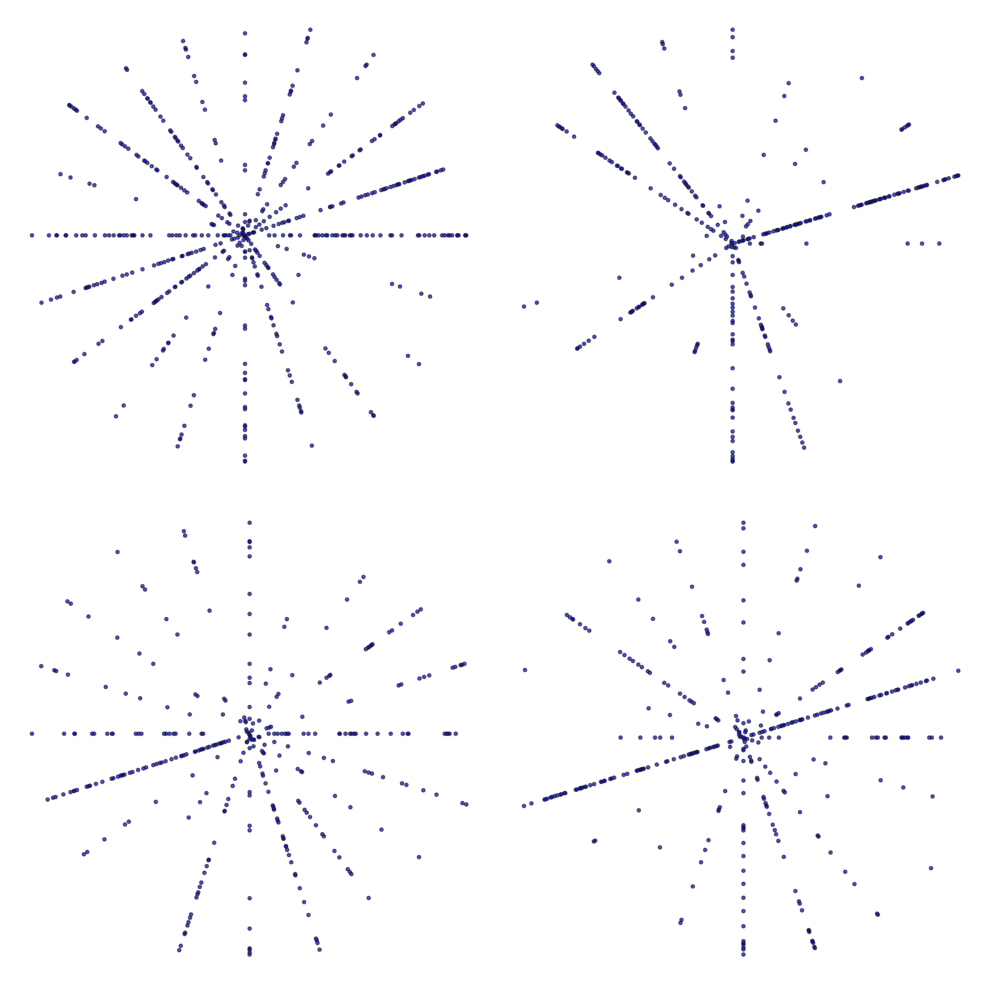

In [3]:
#Four complex-2D images representing the amino acid sequence of the four protein samples are printed 
import matplotlib.pyplot as plt
from PIL import Image
import os

# folder path
folder_path = r"D:/2DproteinIMAGE1"

# Get and sort files in folder
file_list = os.listdir(folder_path)
file_list.sort()

# Image file extensions
image_extensions = ['.png', '.jpg', '.jpeg', '.bmp', '.tiff', '.gif']

# Show four images as output
num_images_to_show = 4
image_files = [file for file in file_list if os.path.splitext(file)[1].lower() in image_extensions]

if len(image_files) >= num_images_to_show:  # Klasörde yeterli dosya varsa
    fig, axes = plt.subplots(2, 2, figsize=(10, 10))  # 2x2 grid ve daha büyük figür boyutu
    axes = axes.flatten()  # axes'i tek boyutlu diziye dönüştür
    for i in range(num_images_to_show):
        file_path = os.path.join(folder_path, image_files[i])
        img = Image.open(file_path)
        axes[i].imshow(img)
        axes[i].axis('off')  # Eksenleri kapat
    plt.tight_layout()  # Daha iyi düzenleme için
    plt.show()
else:
    print("Not enough images found in the folder.")


## STEP 5 (CNN-CLASSIFICATION): 
2D complex image data representing kinase and GPCR proteins are classified using Convolutional Neural networks (CNN).

In [33]:
#2D Complex-based Image data representing kinase and GPCR proteins are classified using Convolutional Neural networks.
import tensorflow as tf
import os
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Uploading images and labels
data_dir = "D:/2DproteinIMAGE1"
img_height, img_width = 64, 64
images = []
labels = []

for file in os.listdir(data_dir):
    if file.endswith(".png"):
        label = int(file.split('_')[-1].split('.')[0])
        img_path = os.path.join(data_dir, file)
        img = load_img(img_path, color_mode='grayscale', target_size=(img_height, img_width))
        img = img_to_array(img)
        images.append(img)
        labels.append(label)

images = np.array(images)
labels = np.array(labels)

# Separation of the data set into training and test sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# One-hot encoding of labels
y_train = to_categorical(y_train, num_classes=2)
y_test = to_categorical(y_test, num_classes=2)

# Creation of Convolutional Neural Network Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 1)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(2, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Training the Model
history = model.fit(X_train, y_train, epochs=45, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/45
5/5 [==============================] - 1s 64ms/step - loss: 166.0821 - accuracy: 0.5188 - val_loss: 30.3356 - val_accuracy: 0.5250
Epoch 2/45
5/5 [==============================] - 0s 33ms/step - loss: 19.3887 - accuracy: 0.4938 - val_loss: 2.6445 - val_accuracy: 0.5250
Epoch 3/45
5/5 [==============================] - 0s 32ms/step - loss: 1.5146 - accuracy: 0.4938 - val_loss: 0.9456 - val_accuracy: 0.5250
Epoch 4/45
5/5 [==============================] - 0s 32ms/step - loss: 0.8886 - accuracy: 0.4500 - val_loss: 0.8097 - val_accuracy: 0.5250
Epoch 5/45
5/5 [==============================] - 0s 31ms/step - loss: 0.7904 - accuracy: 0.5188 - val_loss: 0.8192 - val_accuracy: 0.4750
Epoch 6/45
5/5 [==============================] - 0s 31ms/step - loss: 0.7040 - accuracy: 0.5813 - val_loss: 0.6481 - val_accuracy: 0.6000
Epoch 7/45
5/5 [==============================] - 0s 34ms/step - loss: 0.6526 - accuracy: 0.5625 - val_loss: 0.6568 - val_accuracy: 0.5750
Epoch 8/45
5/5 [=======

- Numerical results and graphs of image classification with convolutional neural networks are given.

Test Accuracy: 0.9750
2/2 [==============================] - 0s 6ms/step


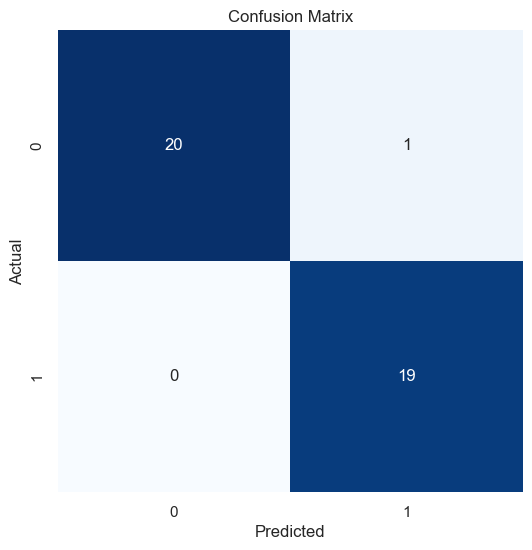

Classification Report of Convolutional Network Model:
_______________________________________________________
               precision    recall  f1-score   support

    GPCR (0)       1.00      0.95      0.98        21
  Kinase (1)       0.95      1.00      0.97        19

    accuracy                           0.97        40
   macro avg       0.97      0.98      0.97        40
weighted avg       0.98      0.97      0.98        40



<Figure size 640x480 with 0 Axes>

In [34]:
#Numerical results and graphs of image classification with convolutional neural networks are given

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Test seti üzerinde modeli değerlendir
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Accuracy: {test_accuracy:.4f}')

# Modelin test seti üzerindeki tahminlerini al
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Confusion Matrix ve Classification Report
conf_matrix = confusion_matrix(y_true, y_pred_classes)
clr = classification_report(y_true, y_pred_classes, target_names=["GPCR (0)", "Kinase (1)"])

# Confusion Matrix Görselleştirmesi
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Test doğruluğunu confusion matrix'in altında yazdırma
plt.figtext(0.5, -0.1, f'Test Accuracy: {test_accuracy:.4f}', ha='center', fontsize=12)

# Classification Report'u yazdırma
print("Classification Report of Convolutional Network Model:\n_______________________________________________________\n", clr)


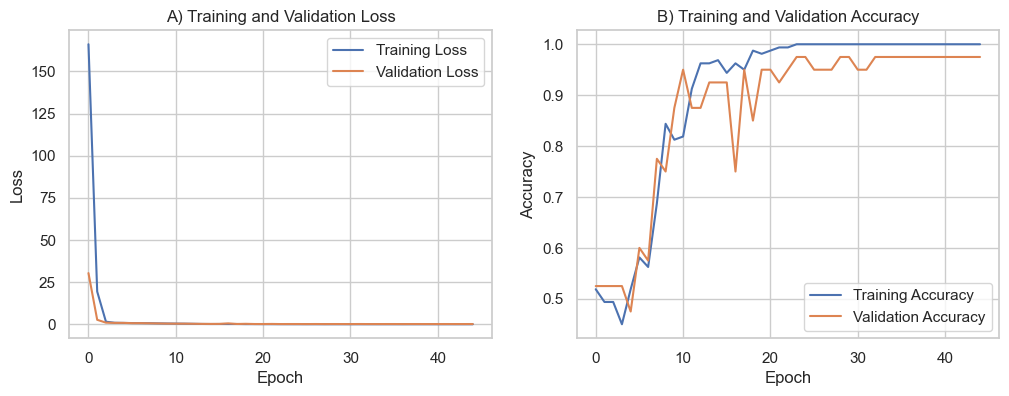

In [35]:
##Graphs of convolutional networks


import matplotlib.pyplot as plt

# Plotting training and validation losses
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('A) Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plotting training and validation accuracies
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('B) Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


## STEP 6 (SVM-2D PROTEİN CLASSIFICATION): 
2D complex image data representing kinase and GPCR proteins are classified using Support vector machines.

In [36]:
#SVM 
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from skimage import exposure

#Directory containing images
image_dir = "D:/2DproteinIMAGE1"

# Lists for storing images and tags
images = []
labels = []

# Read files within directory
for filename in os.listdir(image_dir):
    # Create file path
    file_path = os.path.join(image_dir, filename)
    
    # Upload image
    image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)  # Görüntüleri gri ölçekli olarak yükle
    if image is not None:
        # image histogram sync
        image = exposure.equalize_hist(image)
        images.append(image)
        
        # Remove tag from filename
        if 'label_1' in filename:
            labels.append(1)
        elif 'label_0' in filename:
            labels.append(0)

# Convert images and labels to numpy array
X = np.array(images)
y = np.array(labels)

# Check the dimensions of the images (they should all be the same size)
print("Images shape:", X.shape)
print("Labels shape:", y.shape)

# In this example all images have a size of 64x64 pixels
X_resized = np.array([cv2.resize(img, (64, 64)) for img in X])


X_train, X_test, y_train, y_test = train_test_split(X_resized, y, test_size=0.2, random_state=42)

# Flatten images - SVM does not work with 2D data, requires 1D vectors
X_train_flat = X_train.reshape((X_train.shape[0], -1))
X_test_flat = X_test.reshape((X_test.shape[0], -1))

# Feature scaling (standardization)
scaler = StandardScaler()
X_train_flat = scaler.fit_transform(X_train_flat)
X_test_flat = scaler.transform(X_test_flat)

# Create and train SVM model
svm_model = SVC(kernel='linear')  # Doğrusal bir kernel kullanıyoruz
svm_model.fit(X_train_flat, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test_flat)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Classification report and confusion matrix
print('Classification Report:')
print(classification_report(y_test, y_pred))

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))


Images shape: (200, 1848, 1860)
Labels shape: (200,)
Accuracy: 0.9
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        21
           1       0.89      0.89      0.89        19

    accuracy                           0.90        40
   macro avg       0.90      0.90      0.90        40
weighted avg       0.90      0.90      0.90        40

Confusion Matrix:
[[19  2]
 [ 2 17]]


SVM classification result and confusion matrix

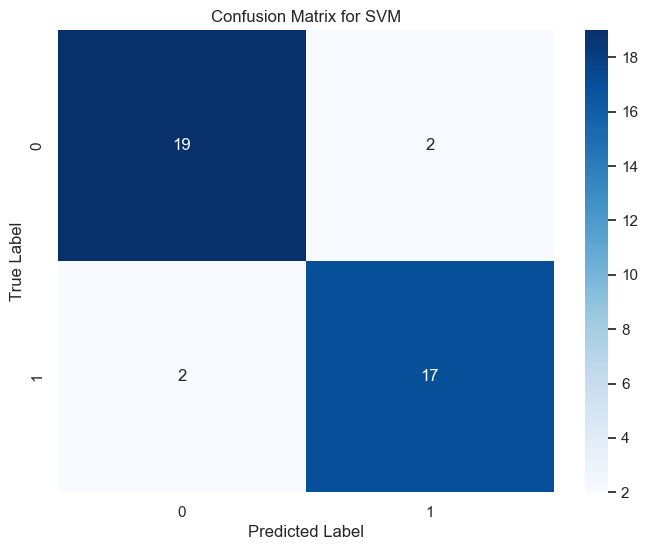

In [37]:
# Calculate confusion matrix

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc


sns.set(style='whitegrid')

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for SVM')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


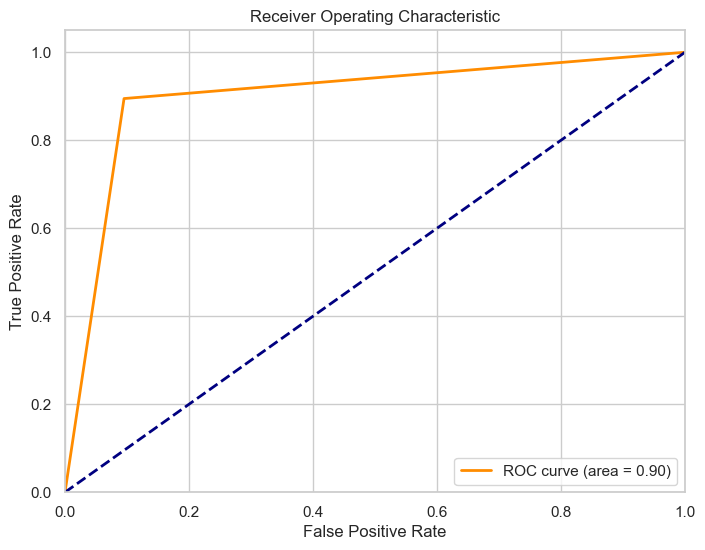

In [38]:
# plot ROC curve for binary classification
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# plot ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


## STEP 7 (RF-2D PROTEİN CLASSIFICATION): 
2D complex image data representing kinase and GPCR proteins are classified using Random Forest.

In [42]:
#random forest (RF), 
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Lists for storing images and tags
images = []
labels = []

# Directory containing images
image_dir = "D:/2DproteinIMAGE1"

# Browse all image files
for filename in os.listdir(image_dir):
    # Dosya yolu
    file_path = os.path.join(image_dir, filename)
    
    # Read image
    image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
    
    # Resize image (e.g. 64x64)
    image_resized = cv2.resize(image, (64, 64))
    
    # Add the image and its tag to lists
    images.append(image_resized)
    
    # Get the label from the filename (e.g. "plot_1_label_1.png" => 1)
    label = int(filename.split('_')[-1].split('.')[0])
    labels.append(label)

# Convert lists to numpy array
X = np.array(images)
y = np.array(labels)

# Flatten images
X_flat = X.reshape(X.shape[0], -1)

# Separate the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_flat, y, test_size=0.2, random_state=42)

# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=10)
rf_model.fit(X_train, y_train)

# Make a prediction on the test set
y_pred = rf_model.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Print confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)


Accuracy: 0.875
Confusion Matrix:
[[18  3]
 [ 2 17]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.86      0.88        21
           1       0.85      0.89      0.87        19

    accuracy                           0.88        40
   macro avg       0.88      0.88      0.87        40
weighted avg       0.88      0.88      0.88        40



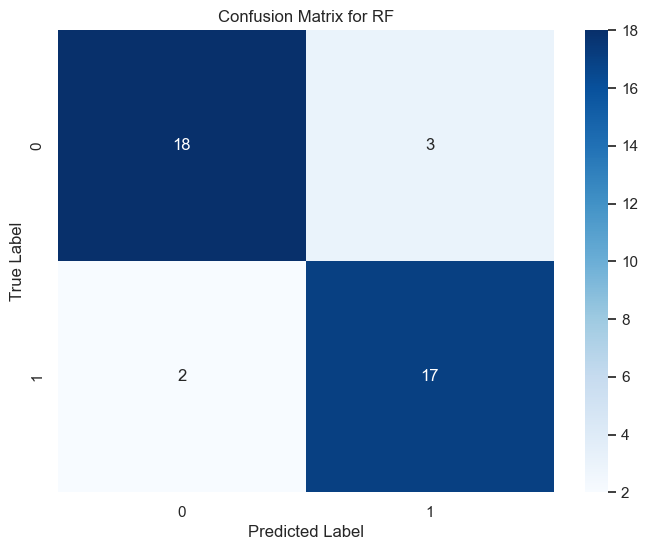

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Seaborn settings
sns.set(style='whitegrid')

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for RF')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()